In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf

#layers = tf.keras.layers
import numpy as np

print(np.__version__)
import tensorflow as tf

print(tf.__version__)

1.19.5
2.6.0


In [ ]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

In [ ]:
import pathlib
data_dir = tf.keras.utils.get_file(origin='https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz',
                                         fname='flower_photos', untar=True)
data_dir = pathlib.Path(data_dir)

228827136/228813984 [==============================] - 28s 0us/step


In [ ]:
image_count = len(list(data_dir.glob('*/*.jpg')))
image_count

3670

In [ ]:
CLASS_NAMES = np.array([item.name for item in data_dir.glob('*') if item.name != "LICENSE.txt"])
CLASS_NAMES

array(['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips'],
      dtype='<U10')

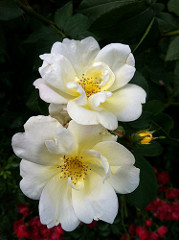

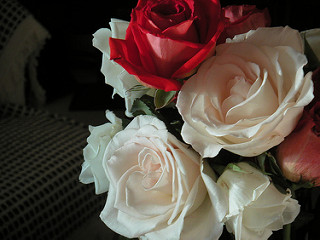

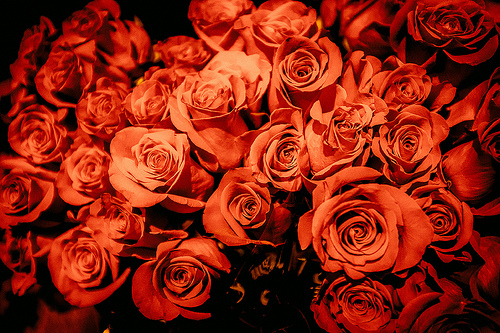

In [ ]:
roses = list(data_dir.glob('roses/*'))

for image_path in roses[:3]:
    display.display(Image.open(str(image_path)))

In [ ]:
image_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

In [ ]:
BATCH_SIZE = 32
IMG_HEIGHT = 224
IMG_WIDTH = 224
STEPS_PER_EPOCH = np.ceil(image_count/BATCH_SIZE)
train_data_gen = image_generator.flow_from_directory(directory=str(data_dir),
                                                     batch_size=BATCH_SIZE,
                                                     shuffle=True,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     classes = list(CLASS_NAMES))

Found 3670 images belonging to 5 classes.


In [ ]:
# Here, define show_batch() procedure for Inspecting a batch.
def show_batch(image_batch, label_batch):
  plt.figure(figsize=(10,10))
  for n in range(25):
      ax = plt.subplot(5,5,n+1) # TODO 1b
      plt.imshow(image_batch[n]) # TODO 1b
      plt.title(CLASS_NAMES[label_batch[n]==1][0].title())
      plt.axis('off')

In [ ]:
image_batch, label_batch = next(train_data_gen)
show_batch(image_batch, label_batch)

In [ ]:
list_ds = tf.data.Dataset.list_files(str(data_dir/'*/*'))
for f in list_ds.take(5):
  print(f.numpy())

b'C:\\Users\\sramasam\\.keras\\datasets\\flower_photos\\sunflowers\\5526324308_b333da0e57_n.jpg'
b'C:\\Users\\sramasam\\.keras\\datasets\\flower_photos\\daisy\\14221836990_90374e6b34.jpg'
b'C:\\Users\\sramasam\\.keras\\datasets\\flower_photos\\dandelion\\8733226215_161309f8ec.jpg'
b'C:\\Users\\sramasam\\.keras\\datasets\\flower_photos\\tulips\\9976515506_d496c5e72c.jpg'
b'C:\\Users\\sramasam\\.keras\\datasets\\flower_photos\\sunflowers\\4933823922_911ac40b0d.jpg'


In [ ]:
def get_label(file_path):
  # TODO 2a
  # convert the path to a list of path components
    parts = tf.strings.split(file_path,os.path.sep)
  # TODO -- Your code here.
  # The second to last is the class-directory
  # TODO -- Your code here.
    return parts[-2] == CLASS_NAMES # TODO 2a

def decode_img(img):
  # convert the compressed string to a 3D uint8 tensor
  img = tf.image.decode_jpeg(img, channels=3) # TODO 2b
  # Use `convert_image_dtype` to convert to floats in the [0,1] range.
  img = tf.image.convert_image_dtype(img, tf.float32) # TODO 2b
  return tf.image.resize(img, [IMG_WIDTH, IMG_HEIGHT])

def process_path(file_path):
  label = get_label(file_path)
  # load the raw data from the file as a string
  img = tf.io.read_file(file_path) # TODO 2c
  img = decode_img(img)
  return img, label

In [ ]:
labeled_ds = list_ds.map(process_path, num_parallel_calls=AUTOTUNE)

In [ ]:
for image, label in labeled_ds.take(1):
  print("Image shape: ", image.numpy().shape)
  print("Label: ", label.numpy())

Image shape:  (224, 224, 3)
Label:  [False False False False  True]


In [ ]:
def prepare_for_training(ds, cache=True, shuffle_buffer_size=1000):
  # This is a small dataset, only load it once, and keep it in memory.
  # use `.cache(filename)` to cache preprocessing work for datasets that don't
  # fit in memory.
  if cache:
    if isinstance(cache, str):
      ds = ds.cache(cache)
    else:
      ds = ds.cache()

  ds = ds.shuffle(buffer_size=shuffle_buffer_size) # TODO 3a

  # Repeat forever
  ds = ds.repeat()

  ds = ds.batch(BATCH_SIZE)

  # `prefetch` lets the dataset fetch batches in the background while the model
  # is training.
  ds = ds.prefetch(buffer_size=AUTOTUNE)

  return ds

In [ ]:
train_ds = prepare_for_training(labeled_ds)

image_batch, label_batch = next(iter(train_ds))

In [ ]:
%matplotlib 
show_batch(image_batch.numpy(), label_batch.numpy())

Using matplotlib backend: nbAgg


<IPython.core.display.Javascript object>

In [1]:
import sys
print(sys.version)

3.8.11 (default, Aug  6 2021, 09:57:55) [MSC v.1916 64 bit (AMD64)]
